In [1]:
import os
os.chdir('/home/roberto/Documents/Titulación/Tesina')

In [2]:
from scripts import *

### Países disponibles:

##### -España
##### -Alemania

### Años disponibles:

##### 2008 a 2017

Correr siguiente celda para repetir toda la simulación

In [3]:
#import multiprocessing
#from joblib import delayed, Parallel

#Parallel(n_jobs=multiprocessing.cpu_count()-3)(delayed(solar_year)(country,year) for country in paises for year in years)

Correr siguiente celda para leer archivos existentes de simulación anterior

In [26]:
#todo = {}
#for year in years:
#    for country in paises:
#        todo[country+str(year)]=pd.read_csv('../Archivos/Output/'+country+str(year)+'.csv',parse_dates=[0])
#        todo[country+str(year)].set_index('time',inplace=True)
#        todo[country+str(year)]=todo[country+str(year)]/1000            ## Convertir a GW

Correr siguiente celda para integrar todos los datos en un único df

In [63]:
#df = pd.concat([todo['Spain2008'],todo['Germany2008']],axis=1)

#for year in years[1:]:
#    df_aux = pd.concat([todo['Spain'+str(year)],todo['Germany'+str(year)]],axis=1)
#    df = pd.concat([df,df_aux])
    
#df.to_csv('../Archivos/Output/Combinado.csv')

Lectura del df único

In [ ]:
df = pd.read_csv('../Archivos/Output/Combinado.csv')
df.set_index('time',inplace=True)

<AxesSubplot:xlabel='time', ylabel='Solar Power [GW]'>

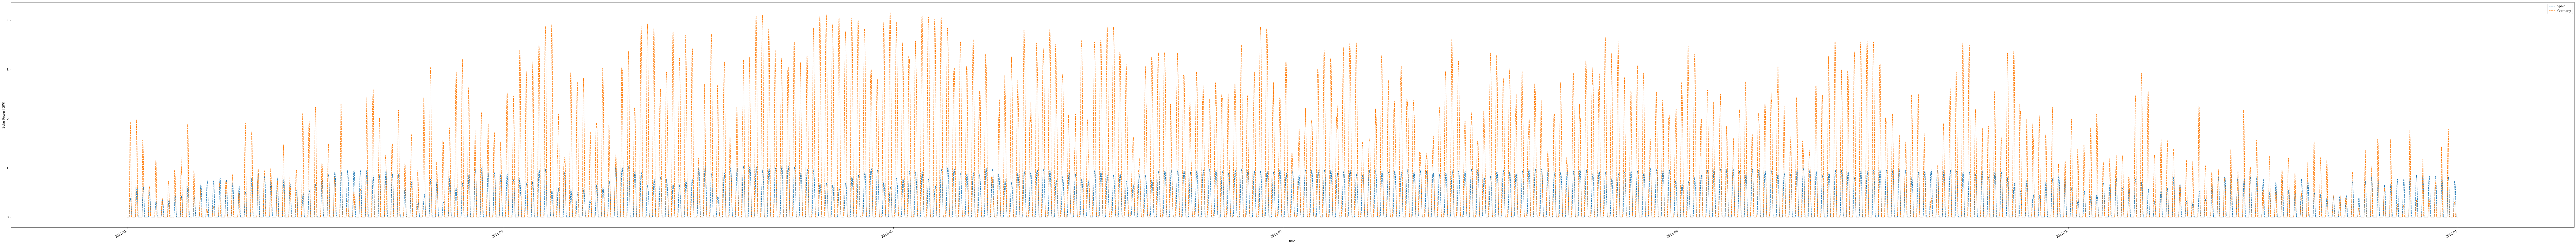

In [60]:
df.loc['2011'].plot(ylabel='Solar Power [GW]', ls='--', figsize=(150, 15))

Área elegible:
Llamar la función eligible_area con argumento 'Spain' o 'Germany' y segundo argumento él uso de suelo a contemplar en el mapa

Uso de suelo disponible:
water
(34,35,39,40)